In [24]:
import pandas as pd
import numpy as np
import os
from collections import Counter

# Eruption base data

In [ ]:
import os
import pandas as pd

base_dir = os.path.dirname(os.getcwd())

path_eruptions_preprocessed = os.path.join(base_dir, "Eruption_data", "eruptions_preprocessed.csv")

if not os.path.exists(path_eruptions_preprocessed):
    raise FileNotFoundError(f"File not found at: {path_eruptions_preprocessed}")

df_eruptions = pd.read_csv(path_eruptions_preprocessed)

print("Eruption dataset with shape:", df_eruptions.shape)
df_eruptions.head()

Eruption dataset with shape: (542, 22)


,Volcano Number,Eruption Number,Volcano Name,Start Year Modifier,Start Year,Start Year Uncertainty,Start Month,Start Day Modifier,Start Day,Start Day Uncertainty,...,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude,Start_Date,End_Date,bbox
0,300130,22609,Karymsky,NaN,2025,NaN,4,NaN,30,NaN,...,NaN,5,NaN,2,NaN,54.049,159.443,2025-04-30,2025-05-02,"[54.03165078433657, 159.40758242983895, 54.069..."
1,334050,22613,Northern EPR at 9.8°N,NaN,2025,NaN,4,NaN,28,NaN,...,NaN,4,NaN,29,NaN,9.830,-104.300,2025-04-28,2025-04-29,NaN
2,273010,22608,Bulusan,NaN,2025,NaN,4,NaN,28,NaN,...,NaN,5,NaN,2,NaN,12.769,124.056,2025-04-28,2025-05-02,"[12.76037572885907, 124.04051915187372, 12.780..."
3,300260,22610,Klyuchevskoy,NaN,2025,NaN,4,NaN,8,NaN,...,NaN,5,NaN,2,NaN,56.056,160.642,2025-04-08,2025-05-02,NaN
4,371020,22612,Reykjanes,NaN,2025,NaN,4,NaN,1,NaN,...,NaN,4,NaN,1,NaN,63.817,-22.717,2025-04-01,2025-04-01,NaN


# Images

In [6]:
from collections import Counter
import os

train_val_dir = r'C:\Users\thsat\sat_imagery_ml\sat-imagery-ml-1\1_DatasetCharacteristics\EruptionImages\sorted images\train_val'
class_counts = Counter(os.listdir(train_val_dir))
print(class_counts)


Counter({'activity_no': 1, 'activity_yes': 1})


In [ ]:
import matplotlib.pyplot as plt

train_val_dir = r'C:\Users\thsat\sat_imagery_ml\sat-imagery-ml-1\1_DatasetCharacteristics\EruptionImages\sorted images\train_val'

plt.figure(figsize=(12, 8))

for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = int(labels[i])
        plt.title(class_names[label])
        plt.axis("off")

Image count per class:
activity_no: 415 images
activity_yes: 415 images


In [ ]:
import os
from collections import defaultdict

train_val_dir = r'C:\Users\thsat\sat_imagery_ml\sat-imagery-ml-1\1_DatasetCharacteristics\EruptionImages\sorted images\train_val'
activity_dirs = ['activity_yes', 'activity_no']

unique_volcanoes = set()
unique_eruption_ids = set()
volcano_eruption_map = defaultdict(set)

for label in activity_dirs:
    folder_path = os.path.join(train_val_dir, label)
    for filename in os.listdir(folder_path):
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
            continue 

        parts = filename.rsplit('.', 1)[0].split('_')  # remove extension and split by underscore

        # valid format: Volcano_EruptionID_Date
        if len(parts) >= 3:
            volcano = parts[0]
            eruption_id = parts[1]

            unique_volcanoes.add(volcano)
            unique_eruption_ids.add(eruption_id)
            volcano_eruption_map[volcano].add(eruption_id)
        else:
            continue

print(f"\n✅ Total unique volcanoes: {len(unique_volcanoes)}")
print(f"✅ Total unique eruption IDs: {len(unique_eruption_ids)}")

print("\n🗻 Unique volcano names:")
for volcano in sorted(unique_volcanoes):
    print(f"- {volcano}")

print("\n🌋 Volcanoes with multiple eruption IDs:")
for volcano, eruptions in volcano_eruption_map.items():
    if len(eruptions) > 1:
        print(f"- {volcano}: {len(eruptions)} eruption IDs")



✅ Total unique volcanoes: 9
✅ Total unique eruption IDs: 19

🗻 Unique volcano names:
- Bezymianny
- Etna
- Home
- Kilauea
- Mauna
- Mayon
- Merapi
- Popocatepetl
- Stromboli

🌋 Volcanoes with multiple eruption IDs:
- Bezymianny: 3 eruption IDs
- Kilauea: 5 eruption IDs
- Mayon: 4 eruption IDs
- Merapi: 2 eruption IDs


In [ ]:
import os

test_dir = r'C:\Users\thsat\sat_imagery_ml\sat-imagery-ml-1\1_DatasetCharacteristics\EruptionImages\sorted images\test'

class_counts = {}

for class_name in os.listdir(train_val_dir):
    class_path = os.path.join(train_val_dir, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))]
        class_counts[class_name] = len(image_files)

print("Image count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Image count per class:
activity_no: 59 images
activity_yes: 59 images


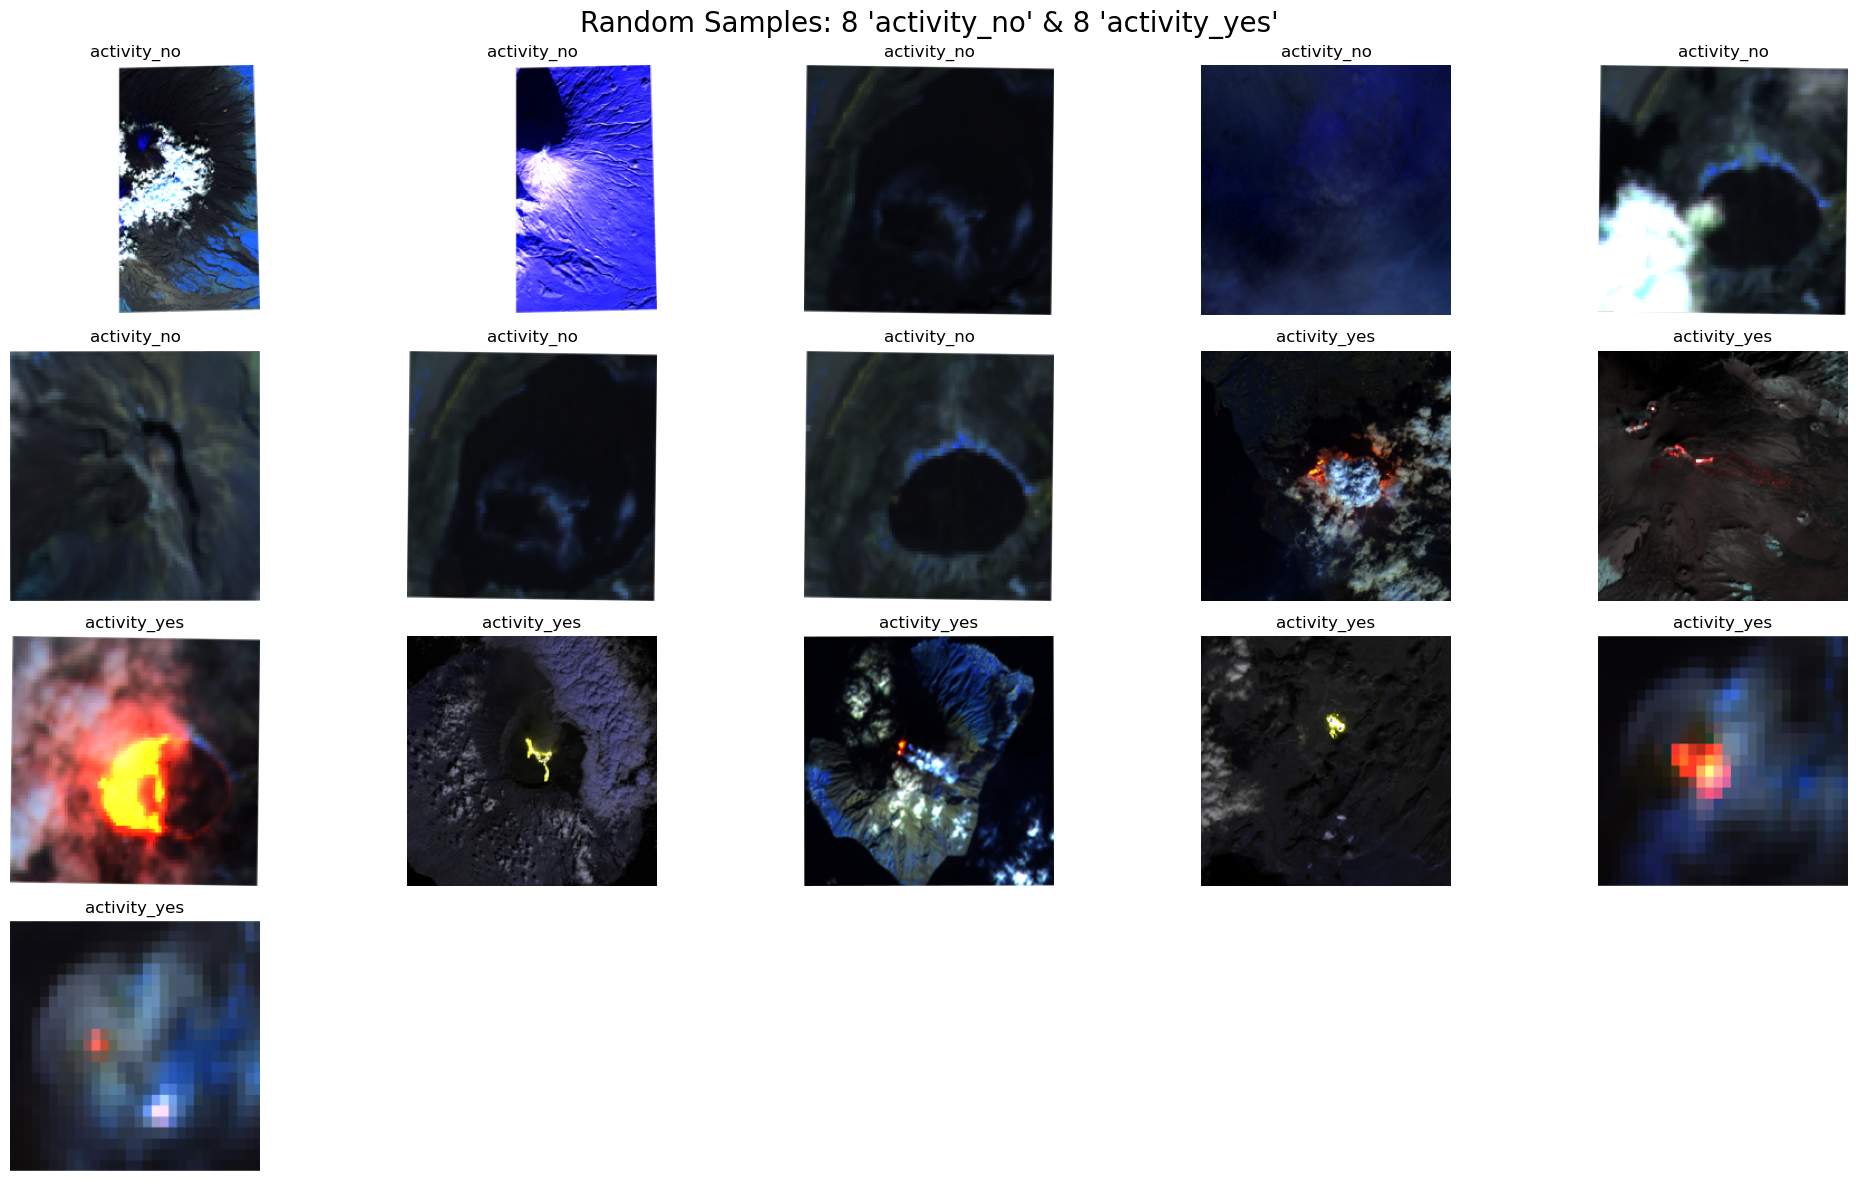

In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

train_val_dir = r'C:\Users\thsat\sat_imagery_ml\sat-imagery-ml-1\1_DatasetCharacteristics\EruptionImages\sorted images\train_val'

class_dirs = ['activity_no', 'activity_yes']
samples_per_class = 8
img_size = (224, 224) 

image_paths = []

for cls in class_dirs:
    class_path = os.path.join(train_val_dir, cls)
    all_images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))]
    selected_images = random.sample(all_images, min(samples_per_class, len(all_images)))
    image_paths.extend([(os.path.join(class_path, img), cls) for img in selected_images])

plt.figure(figsize=(20, 12))

for idx, (img_path, label) in enumerate(image_paths):
    img = Image.open(img_path).resize(img_size)
    ax = plt.subplot(4, 5, idx + 1)
    plt.imshow(img)
    plt.title(label, fontsize=12)
    plt.axis("off")

plt.suptitle("Random Samples: 8 'activity_no' & 8 'activity_yes'", fontsize=20)
plt.tight_layout()
plt.show()
